In [1]:
import RockPy3
RockPy3.logger.setLevel('ERROR')
%pylab inline

INFO     RockPy3         RockPy3 rocks! Git repository version: b'101cec6-dirty'
INFO     RockPy3         RockPy3 test_data_path: /Users/mike/GitHub/2015_highT_af/RockPy3/testing/test_data
INFO     RockPy3         RockPy3 installation_directory: /Users/mike/Google Drive/__code/RockPy3
INFO     RockPy3         using matplotlib  : version 1.5.3
INFO     RockPy3         using numpy       : version 1.11.1
INFO     RockPy3         using scipy       : version 0.18.1
INFO     RockPy3         using lmfit       : version 0.9.5
INFO     RockPy3         using pint        : version 0.7.2
INFO     RockPy3         using decorator   : version 4.0.10
INFO     RockPy3         using tabulate    : version 0.7.5
ERROR    RockPy3         please install basemap
INFO     RockPy3         CREATING study << MasterStudy >>


IMPLEMENTED MEASUREMENT TYPES     : 	FTYPES
---------------------------------------------------------------------------
	acquisition               : 	jr6, sushibar
	afdemagnetization         : 	cryomag, jr6, sushibar
	arm_acquisition           : 	jr6, sushibar
	backfield                 : 	vftb, vsm
	bedding                   : 	generic
	demagnetization           : 	cryomag, jr6, sushibar
	diameter                  : 	generic
	height                    : 	generic
	htarm_acquisition         : 	jr6, sushibar
	hysteresis                : 	vftb, vsm, mpms
	irm_acquisition           : 	vsm, jr6, sushibar
	length                    : 	generic
	locationgeo               : 	generic
	mass                      : 	generic
	orientationgeo            : 	generic
	paleointensity            : 	
	parameter                 : 	
	parm_acquisition          : 	jr6, sushibar
	thermaldemagnetization    : 	cryomag, jr6, sushibar
	thermocurve               : 	vftb, vsm, mpms
	trm_acquisition           : 	jr6, s

In [2]:
paper_folder = '/Users/mike/GitHub/writing/working paper/HighTempAF' # for publication

In [3]:
S = RockPy3.RockPyStudy(folder='/Users/mike/Dropbox/experimental_data/006_HT-ARM-AF/HYS')

IMPORT generated 12 measurements: finished in 5.35e-01s


/Users/mike/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


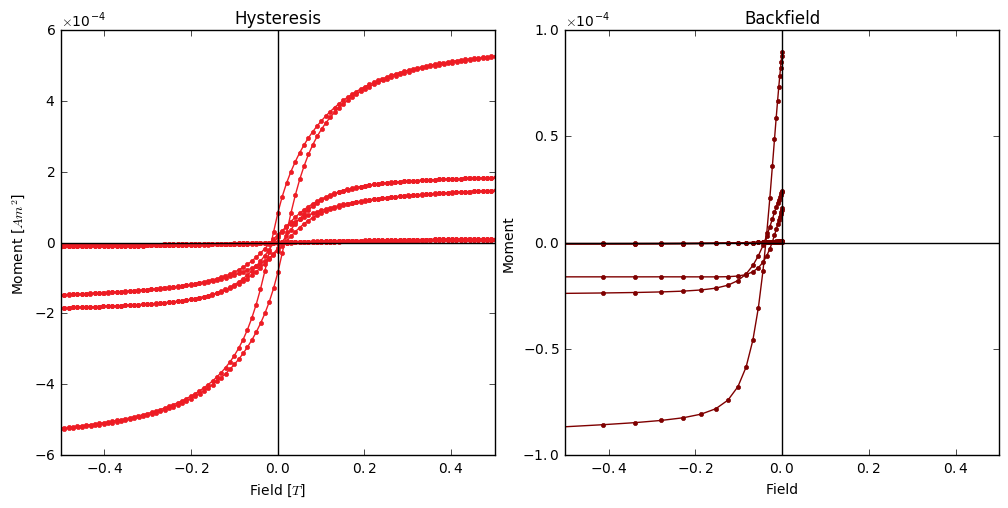

In [4]:
fig = RockPy3.Figure(data=S)
v = fig.add_visual('hysteresis', marker='.')
v = fig.add_visual('backfield', marker='.')
fig.show(xlim=(-.5,.5))

/Users/mike/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


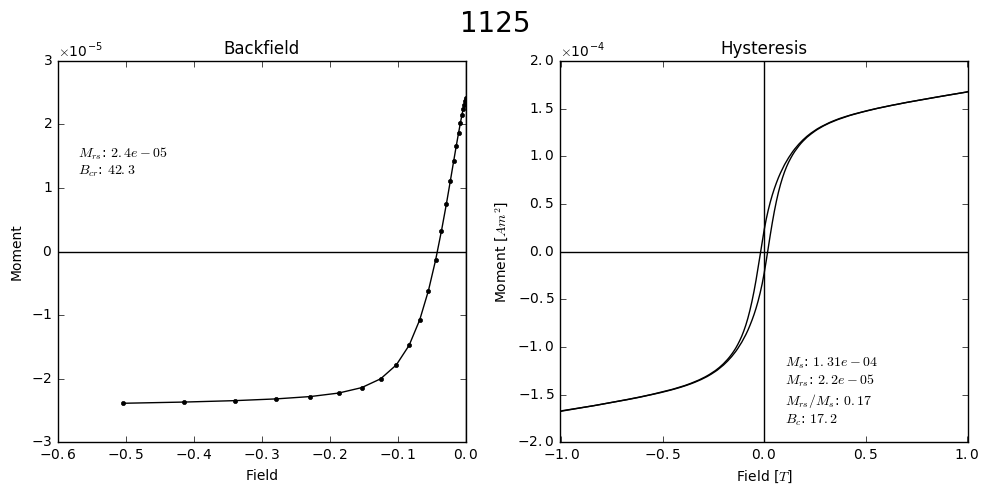

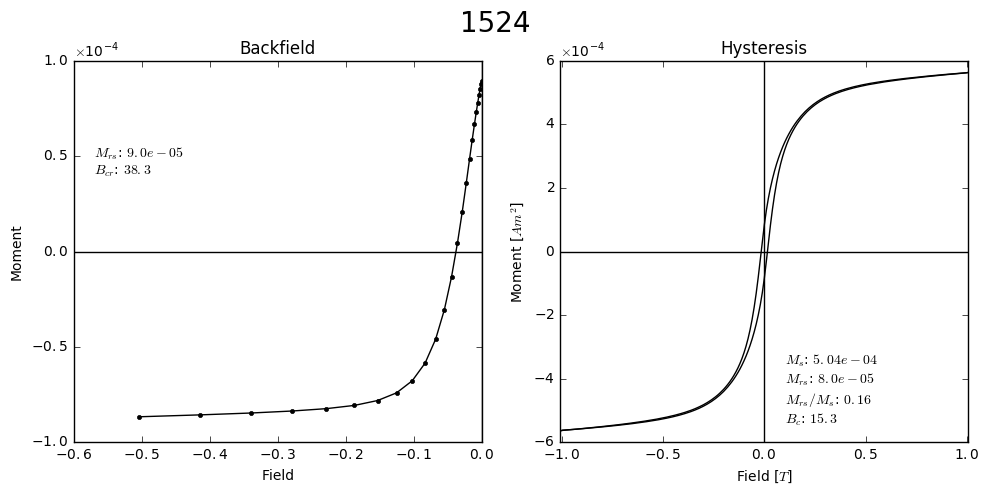

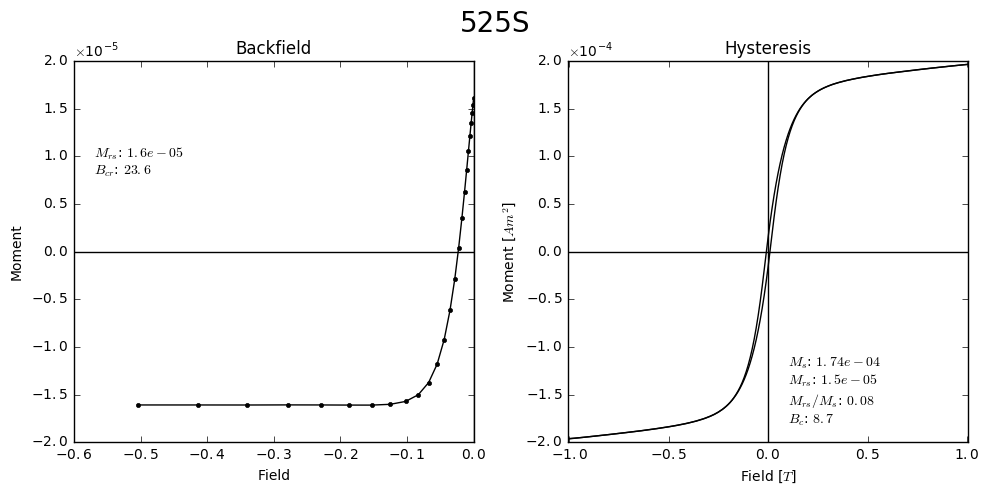

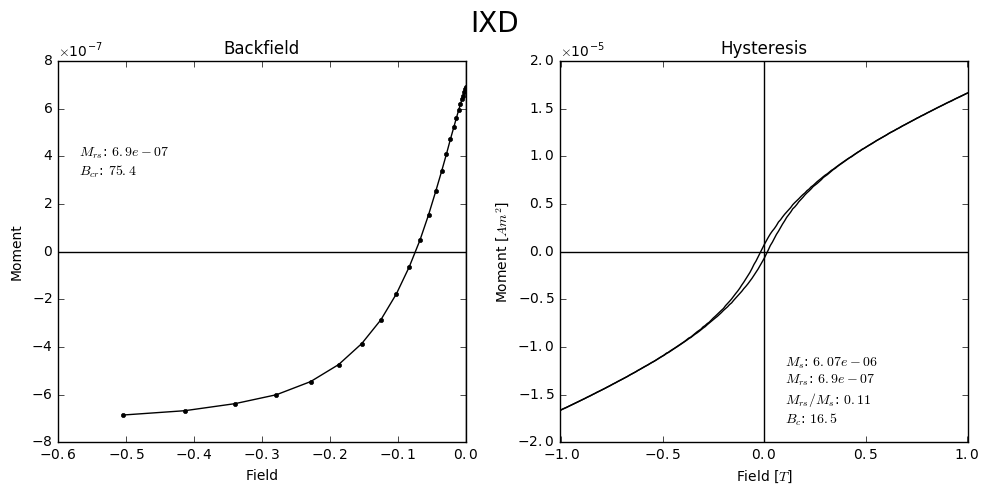

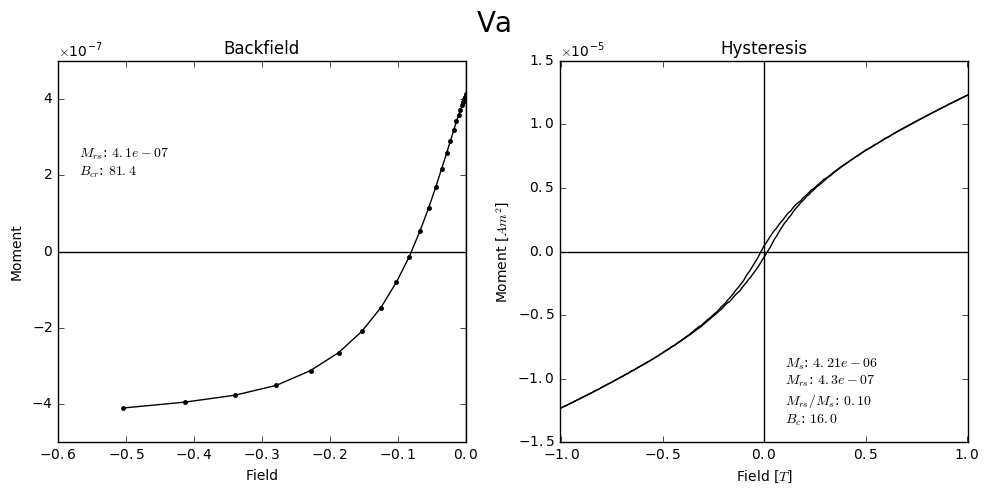

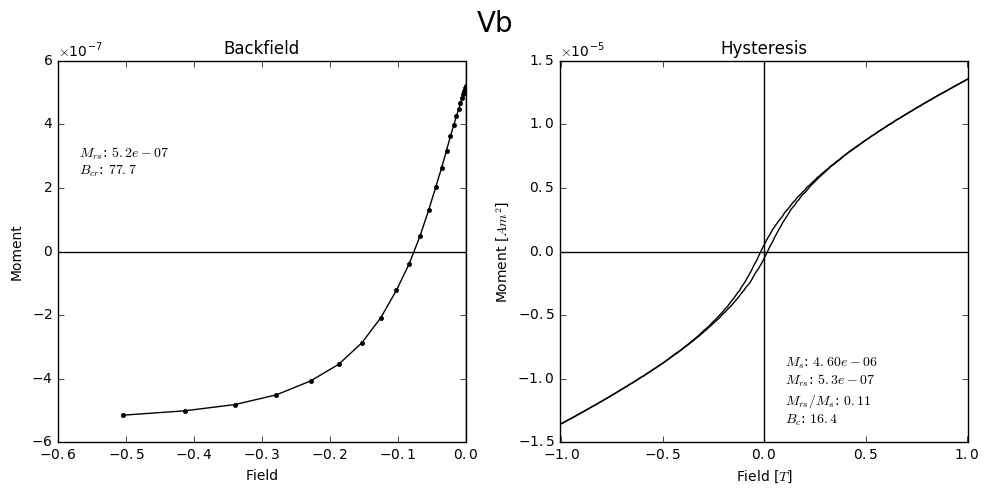

In [5]:
for s in S:
    s.plot()

In [6]:
for m in S.get_measurement(mtype='hys'):
    m.correct_paramag()

In [7]:
for m in S.get_measurement():
    m.normalize('mass')

In [8]:
S.color_from_sample()

In [20]:
colors = 'krbkrb'
markers = 'sssooo'
for i, m in enumerate(S.samplelist):
    m.set_plt_prop('color', colors[i])
    m.set_plt_prop('marker', markers[i])

/Users/mike/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


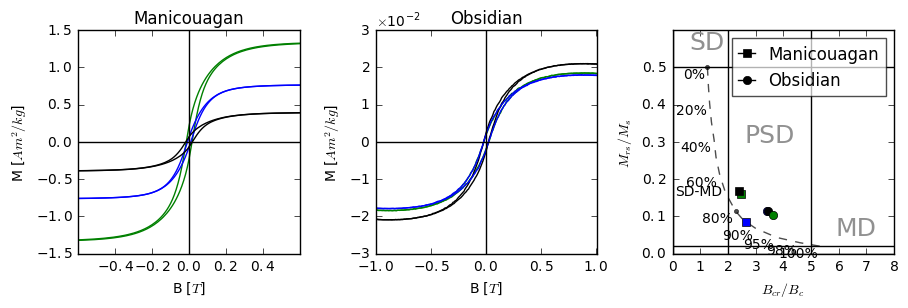

In [62]:
import matplotlib.lines as mlines
f = RockPy3.Figure(figsize=(3,3))
v = f.add_visual(data=S.get_measurement(sname=('1125', '1524', '525S')), 
                 visual='hysteresis', xlim=(-0.6, 0.6), markevery=8)
v.title = 'Manicouagan'
v.ylabel = 'M [$Am^2/kg$]'
v.xlabel = 'B [$T$]'

v = f.add_visual(data=S.get_measurement(sname=('IXD', 'Va', 'Vb')), visual='hysteresis')
v.title = 'Obsidian'
v.ylabel = 'M [$Am^2/kg$]'
v.xlabel = 'B [$T$]'

v = f.add_visual(data=S, visual='day', xlim=(0,8), ylim=(0,0.6), markevery=8)
v.title=''
v.ylabel = '$M_{rs}/M_{s}$'
v.xlabel = '$B_{cr}/B_c$'
v.add_feature('sd_md_mixline_1')

f = f.show(return_figure=True)

l1 = mlines.Line2D([], [], color='k', marker='o',
                          label='Obsidian')
l2 = mlines.Line2D([], [], color='k', marker='s',
                          label='Manicouagan')
l = v.ax.legend(handles = [l2,l1], frameon=True, numpoints=1, handlelength=1)
l.get_frame().set_alpha(0.7)
tight_layout()
savefig('/Users/mike/GitHub/writing/working paper/HighTempAF/fig01_rockmag.pdf')